## Import libraries and read Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'c:\Users\dell\Downloads\201904-fordgobike-tripdata.csv')

## Data Representation

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No


In [5]:
df.shape

(239111, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             239111 non-null  int64  
 1   start_time               239111 non-null  object 
 2   end_time                 239111 non-null  object 
 3   start_station_id         239047 non-null  float64
 4   start_station_name       239047 non-null  object 
 5   start_station_latitude   239111 non-null  float64
 6   start_station_longitude  239111 non-null  float64
 7   end_station_id           239047 non-null  float64
 8   end_station_name         239047 non-null  object 
 9   end_station_latitude     239111 non-null  float64
 10  end_station_longitude    239111 non-null  float64
 11  bike_id                  239111 non-null  int64  
 12  user_type                239111 non-null  object 
 13  member_birth_year        227912 non-null  float64
 14  memb

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,239111.000000,239047.000000,239111.000000,239111.000000,239047.000000,239111.000000,239111.000000,239111.000000,227912.000000
mean,802.671199,141.836538,37.769536,-122.352503,140.838099,37.766996,-122.343420,3666.956493,1984.863250
std,1990.006091,116.289776,0.127698,0.277088,116.386168,0.343083,1.068144,2180.717333,9.953144
min,61.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,11.000000,1878.000000
25%,349.000000,47.000000,37.770083,-122.413004,44.000000,37.770407,-122.411738,1720.000000,1980.000000
50%,558.000000,104.000000,37.780760,-122.398285,102.000000,37.780955,-122.397437,3471.000000,1987.000000
75%,876.000000,240.000000,37.797280,-122.291209,239.000000,37.797320,-122.291376,5749.000000,1992.000000
max,86114.000000,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,7108.000000,2001.000000


## Data Cleaning

In [8]:
len(df['bike_id'].unique())

4520

#### Handle duplicates

In [9]:
df.duplicated().sum()

0

#### Handle Datatype

In [10]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

#df['member_birth_year']=df['member_birth_year'].fillna(0).astype('int64')
#df['end_station_id']=df['end_station_id'].fillna(0).astype('int64')
#df['start_station_id']=df['start_station_id'].fillna(0).astype('int64')

#### Handle Missing Values using imputation method

In [11]:
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id              64
start_station_name            64
start_station_latitude         0
start_station_longitude        0
end_station_id                64
end_station_name              64
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          11199
member_gender              11199
bike_share_for_all_trip        0
dtype: int64

In [12]:
df[df['start_station_id'].isna()]  # we observated that the same rows don't have 'start_station_id' ,'start_station_name' don't have 'end_station_id', 'end_station_name'

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
10983,1131,2019-04-29 15:30:48.389,2019-04-29 15:49:39.480,NaN,NaN,37.41,-121.95,NaN,NaN,37.42,-121.96,4106,Customer,1979.0,Female,No
11568,268,2019-04-29 13:12:08.928,2019-04-29 13:16:37.874,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.94,4106,Customer,1991.0,Male,No
14814,669,2019-04-28 23:02:16.286,2019-04-28 23:13:25.667,NaN,NaN,37.40,-121.95,NaN,NaN,37.40,-121.94,4285,Customer,1989.0,Female,No
16067,94,2019-04-28 16:30:12.368,2019-04-28 16:31:46.866,NaN,NaN,37.40,-121.95,NaN,NaN,37.40,-121.95,4285,Customer,1986.0,Male,No
17179,2389,2019-04-28 12:24:07.683,2019-04-28 13:03:57.471,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4244,Customer,1966.0,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226208,681,2019-04-02 12:27:15.531,2019-04-02 12:38:36.932,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4211,Subscriber,1986.0,Male,No
230020,4803,2019-04-01 19:03:07.473,2019-04-01 20:23:10.731,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.94,4270,Customer,1995.0,Male,No
232901,13460,2019-04-01 13:42:15.073,2019-04-01 17:26:35.895,NaN,NaN,37.41,-121.95,NaN,NaN,37.40,-121.94,4098,Customer,1991.0,Male,No
234606,229,2019-04-01 13:17:14.567,2019-04-01 13:21:03.941,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.94,4098,Customer,1991.0,Male,No


In [13]:
df['member_gender'][df['start_station_id'].isna()].isna().sum() 

0

In [14]:
df['member_birth_year'][df['start_station_id'].isna()].isna().sum() 

0

In [15]:
x=df.dropna(subset=['member_birth_year'])


y=x[['start_station_id','end_station_id']]
x=x.drop(['start_station_id','start_station_name','end_station_id','end_station_name'],axis=1)

In [16]:
x['user_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [17]:
x['user_type'] = x['user_type'].apply(lambda x: 1 if x == 'Subscriber' else 0)
x['member_gender'] = x['member_gender'].apply(lambda x: 1 if x == 'Male' else 0)
x['bike_share_for_all_trip'] = x['bike_share_for_all_trip'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
y_test = y[y['start_station_id'].isna()]
y_train = y.dropna(subset=['start_station_id'])


x_train = x.loc[y_train.index]  
x_test = x.loc[y_test.index]


In [19]:
y_train

,start_station_id,end_station_id
0,368.0,324.0
2,64.0,64.0
3,67.0,89.0
4,124.0,5.0
5,243.0,247.0
...,...,...
239106,133.0,132.0
239107,78.0,77.0
239108,243.0,269.0
239109,370.0,43.0


In [20]:
y_test

,start_station_id,end_station_id
10983,NaN,NaN
11568,NaN,NaN
14814,NaN,NaN
16067,NaN,NaN
17179,NaN,NaN
...,...,...
226208,NaN,NaN
230020,NaN,NaN
232901,NaN,NaN
234606,NaN,NaN


In [21]:
x_train

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,37.785434,-122.419622,37.788300,-122.408531,2749,1,1989.0,0,0
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,37.776754,-122.399018,37.776754,-122.399018,258,1,1993.0,1,0
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,37.776639,-122.395526,37.769218,-122.407646,1974,1,1972.0,1,0
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,37.760447,-122.410807,37.783899,-122.408445,877,1,1973.0,1,0
5,1388,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313,37.869360,-122.254337,37.867789,-122.265896,3234,0,1997.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239106,184,2019-04-01 00:09:17.566,2019-04-01 00:12:22.517,37.755213,-122.420975,37.751819,-122.426614,6430,1,1976.0,1,0
239107,539,2019-04-01 00:03:02.573,2019-04-01 00:12:02.067,37.773717,-122.411647,37.773507,-122.416040,4972,1,1981.0,1,1
239108,292,2019-04-01 00:06:04.237,2019-04-01 00:10:56.985,37.869360,-122.254337,37.862320,-122.258801,3415,1,1997.0,1,1
239109,471,2019-04-01 00:01:38.411,2019-04-01 00:09:29.965,37.787327,-122.413278,37.778768,-122.415929,5018,1,1996.0,0,1


In [22]:
x_test

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
10983,1131,2019-04-29 15:30:48.389,2019-04-29 15:49:39.480,37.41,-121.95,37.42,-121.96,4106,0,1979.0,0,0
11568,268,2019-04-29 13:12:08.928,2019-04-29 13:16:37.874,37.41,-121.94,37.41,-121.94,4106,0,1991.0,1,0
14814,669,2019-04-28 23:02:16.286,2019-04-28 23:13:25.667,37.40,-121.95,37.40,-121.94,4285,0,1989.0,0,0
16067,94,2019-04-28 16:30:12.368,2019-04-28 16:31:46.866,37.40,-121.95,37.40,-121.95,4285,0,1986.0,1,0
17179,2389,2019-04-28 12:24:07.683,2019-04-28 13:03:57.471,37.40,-121.94,37.40,-121.94,4244,0,1966.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
226208,681,2019-04-02 12:27:15.531,2019-04-02 12:38:36.932,37.39,-121.93,37.40,-121.93,4211,1,1986.0,1,0
230020,4803,2019-04-01 19:03:07.473,2019-04-01 20:23:10.731,37.40,-121.93,37.40,-121.94,4270,0,1995.0,1,0
232901,13460,2019-04-01 13:42:15.073,2019-04-01 17:26:35.895,37.41,-121.95,37.40,-121.94,4098,0,1991.0,1,0
234606,229,2019-04-01 13:17:14.567,2019-04-01 13:21:03.941,37.41,-121.94,37.41,-121.94,4098,0,1991.0,1,0


In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227912 entries, 0 to 239110
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             227912 non-null  int64         
 1   start_time               227912 non-null  datetime64[ns]
 2   end_time                 227912 non-null  datetime64[ns]
 3   start_station_latitude   227912 non-null  float64       
 4   start_station_longitude  227912 non-null  float64       
 5   end_station_latitude     227912 non-null  float64       
 6   end_station_longitude    227912 non-null  float64       
 7   bike_id                  227912 non-null  int64         
 8   user_type                227912 non-null  int64         
 9   member_birth_year        227912 non-null  float64       
 10  member_gender            227912 non-null  int64         
 11  bike_share_for_all_trip  227912 non-null  int64         
dtypes: datetime64[ns](2),

In [24]:
x_train = x_train.select_dtypes(include=['number']).fillna(0)
x_test = x_test.select_dtypes(include=['number']).fillna(0)

In [25]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import csr_matrix

# Convert y_train and y_test to sparse matrices
y_train_sparse = csr_matrix(y_train.values)
y_test_sparse = csr_matrix(y_test.values)

# Initialize the Binary Relevance model
br_model = BinaryRelevance(classifier=GaussianNB())

# Fit the model
br_model.fit(x_train, y_train_sparse)

# Predict
y_pred_sparse = br_model.predict(x_test)

# Convert predictions back to dense format
y_pred = y_pred_sparse.toarray()




d:\Anconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
d:\Anconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [26]:
y_pred

array([[397., 395.],
       [395., 395.],
       [396., 395.],
       [395., 395.],
       [391., 407.],
       [287., 395.],
       [395., 395.],
       [396., 395.],
       [287., 395.],
       [287., 395.],
       [304., 313.],
       [396., 395.],
       [287., 395.],
       [395., 395.],
       [395., 395.],
       [395., 395.],
       [312., 312.],
       [395., 395.],
       [395., 395.],
       [395., 395.],
       [396., 395.],
       [395., 395.],
       [395., 395.],
       [389., 288.],
       [395., 395.],
       [395., 395.],
       [395., 395.],
       [395., 395.],
       [395., 395.],
       [395., 395.],
       [395., 395.],
       [395., 395.],
       [396., 395.],
       [304., 416.],
       [395., 395.],
       [391., 407.],
       [395., 395.],
       [395., 395.],
       [312., 312.],
       [395., 395.],
       [395., 395.],
       [397., 395.],
       [395., 395.],
       [395., 395.],
       [395., 395.],
       [312., 312.],
       [311., 401.],
       [312.,

In [27]:
y_test['start_station_id'] = y_pred[:, 0]
y_test['end_station_id'] = y_pred[:, 1]

C:\Users\dell\AppData\Local\Temp\ipykernel_10956\3647824323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['start_station_id'] = y_pred[:, 0]
C:\Users\dell\AppData\Local\Temp\ipykernel_10956\3647824323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['end_station_id'] = y_pred[:, 1]


In [28]:
y_test

,start_station_id,end_station_id
10983,397.0,395.0
11568,395.0,395.0
14814,396.0,395.0
16067,395.0,395.0
17179,391.0,407.0
...,...,...
226208,312.0,312.0
230020,395.0,416.0
232901,304.0,378.0
234606,395.0,395.0


In [29]:
df.loc[y_test.index, ['start_station_id','end_station_id']] = y_test[['start_station_id','end_station_id']]

In [30]:
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name            64
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name              64
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          11199
member_gender              11199
bike_share_for_all_trip        0
dtype: int64

In [31]:
df['start_station_name'] = df.groupby('start_station_id')['start_station_name'].transform(
    lambda x: x.ffill().bfill()
)



df['end_station_name'] = df.groupby('end_station_id')['end_station_name'].transform(
    lambda x: x.ffill().bfill()
)

In [32]:
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          11199
member_gender              11199
bike_share_for_all_trip        0
dtype: int64

In [33]:
y=df[['member_gender','member_birth_year']]
x=df.drop(['member_gender','member_birth_year'],axis=1)



x['user_type'] = x['user_type'].apply(lambda x: 1 if x == 'Subscriber' else 0)
y['member_gender'] = y['member_gender'].apply(lambda x: 1 if x == 'Male' else (0 if x == 'Female' else None))
x['bike_share_for_all_trip'] = x['bike_share_for_all_trip'].apply(lambda x: 1 if x == 'Yes' else 0)



y_test = y[y['member_gender'].isna()]
y_train = y.dropna(subset=['member_gender'])
x_train = x.loc[y_train.index]  
x_test = x.loc[y_test.index]



x_train = x_train.select_dtypes(include=['number']).fillna(0)
x_test = x_test.select_dtypes(include=['number']).fillna(0)

C:\Users\dell\AppData\Local\Temp\ipykernel_10956\1126352507.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['member_gender'] = y['member_gender'].apply(lambda x: 1 if x == 'Male' else (0 if x == 'Female' else None))


In [34]:
x_test

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
1,53725,246.0,37.869060,-122.270556,241.0,37.852477,-122.270213,2608,0,0
26,142,267.0,37.861804,-122.253569,253.0,37.866418,-122.253799,1378,1,1
42,123,253.0,37.866418,-122.253799,243.0,37.869360,-122.254337,3234,1,1
56,295,246.0,37.869060,-122.270556,266.0,37.862464,-122.264791,1363,1,0
60,1179,121.0,37.759210,-122.421339,44.0,37.781074,-122.411738,1851,0,0
...,...,...,...,...,...,...,...,...,...,...
238932,282,223.0,37.764765,-122.420091,100.0,37.767100,-122.410662,5249,1,0
239017,564,56.0,37.773414,-122.427317,20.0,37.791300,-122.399051,6878,0,0
239028,946,10.0,37.795393,-122.404770,368.0,37.785434,-122.419622,4944,1,0
239084,306,84.0,37.769200,-122.433812,71.0,37.773063,-122.439078,6258,0,0


In [35]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import csr_matrix

# Convert y_train and y_test to sparse matrices
y_train_sparse = csr_matrix(y_train.values)
y_test_sparse = csr_matrix(y_test.values)

# Initialize the Binary Relevance model
br_model = BinaryRelevance(classifier=GaussianNB())

# Fit the model
br_model.fit(x_train, y_train_sparse)

# Predict
y_pred_sparse = br_model.predict(x_test)

# Convert predictions back to dense format
y_pred = y_pred_sparse.toarray()




d:\Anconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
d:\Anconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [36]:
y_test['member_gender'] = y_pred[:, 0]
y_test['member_birth_year'] = y_pred[:, 1]


df.loc[y_test.index, ['member_gender','member_birth_year']] = y_test[['member_gender','member_birth_year']]

C:\Users\dell\AppData\Local\Temp\ipykernel_10956\1592149120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['member_gender'] = y_pred[:, 0]
C:\Users\dell\AppData\Local\Temp\ipykernel_10956\1592149120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['member_birth_year'] = y_pred[:, 1]


In [37]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [38]:
df['member_gender'] = df['member_gender'].apply(lambda x: 'Male' if x == 1 else 'Female')

In [39]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.632,2019-05-01 11:39:06.917,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,1943.0,Female,No
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Female,No
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Female,No
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239106,184,2019-04-01 00:09:17.566,2019-04-01 00:12:22.517,133.0,Valencia St at 22nd St,37.755213,-122.420975,132.0,24th St at Chattanooga St,37.751819,-122.426614,6430,Subscriber,1976.0,Female,No
239107,539,2019-04-01 00:03:02.573,2019-04-01 00:12:02.067,78.0,Folsom St at 9th St,37.773717,-122.411647,77.0,11th St at Natoma St,37.773507,-122.416040,4972,Subscriber,1981.0,Female,Yes
239108,292,2019-04-01 00:06:04.237,2019-04-01 00:10:56.985,243.0,Bancroft Way at College Ave,37.869360,-122.254337,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,3415,Subscriber,1997.0,Female,Yes
239109,471,2019-04-01 00:01:38.411,2019-04-01 00:09:29.965,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5018,Subscriber,1996.0,Female,Yes


# EDA

##### there is relation between member_gender and duration of trip? -------> YES, if the trip take more than 3 Hours,then the member is Female

<Axes: xlabel='member_gender', ylabel='duration_sec'>

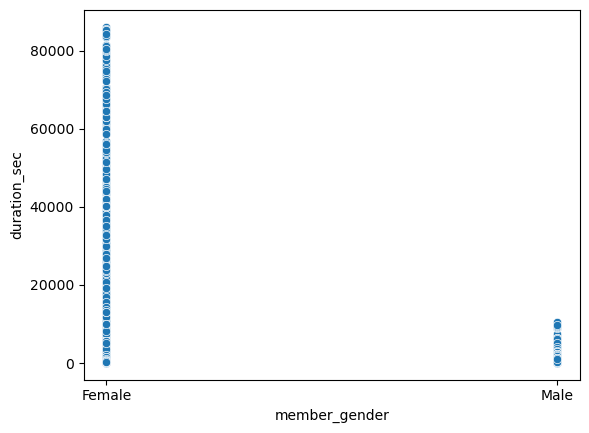

In [40]:
sns.scatterplot(x=df["member_gender"], y=df["duration_sec"])

In [41]:
# The maximum time males take it
df[df['member_gender']=='Male']['duration_sec'].max()

10512

##### What is the most common gender used bike? ----> Female which represent 96% from bikers

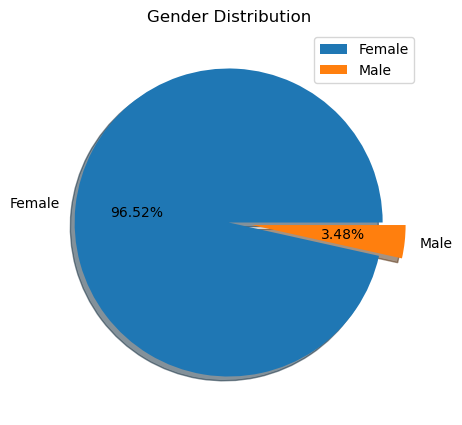

In [42]:
plt.figure(figsize=(5,5))

temp=df['member_gender'].value_counts()
plt.pie(temp.values, labels=temp.index, explode=[0, 0.15], autopct="%1.2f%%", shadow=True)

plt.title('Gender Distribution')
plt.legend(loc='upper right')

##### Is there a relationship between gender and user type (e.q., Subscriber, Customer) ? -----> NO, both genders are subscribers

Text(0.5, 0, 'Gender')

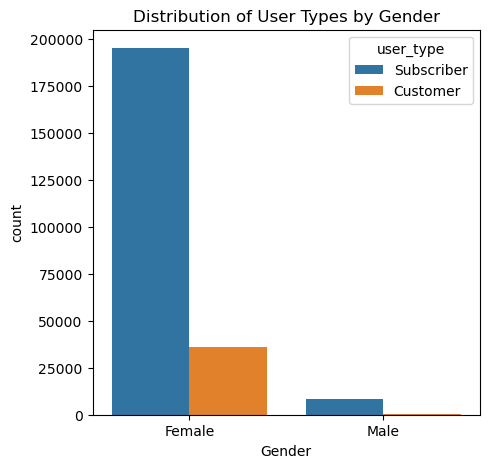

In [43]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='member_gender', hue='user_type')
plt.title('Distribution of User Types by Gender')
plt.xlabel('Gender')

##### is there a specific bike for subscribers or customers -----> No

<Axes: xlabel='bike_id', ylabel='user_type'>

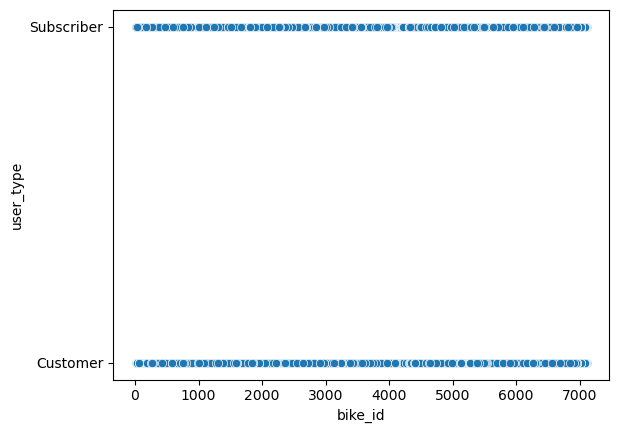

In [44]:
sns.scatterplot(x=df["bike_id"], y=df["user_type"])

#### Adults Females (20:40 age) are most used the bikes

In [45]:
df['member_birth_year']=df['member_birth_year'].astype('int')
df['age']=2019-df['member_birth_year']

<Axes: xlabel='member_gender', ylabel='age'>

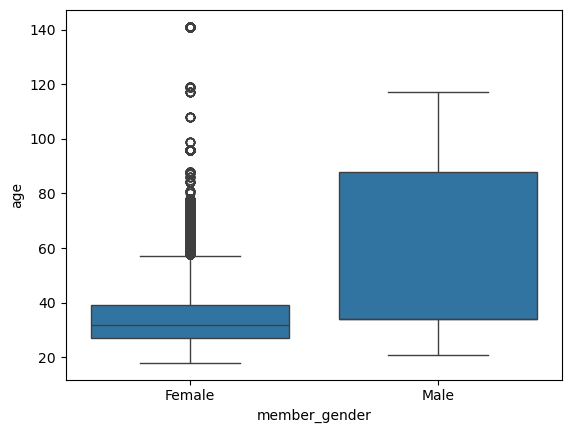

In [46]:
sns.boxplot(data=df, x='member_gender', y='age')

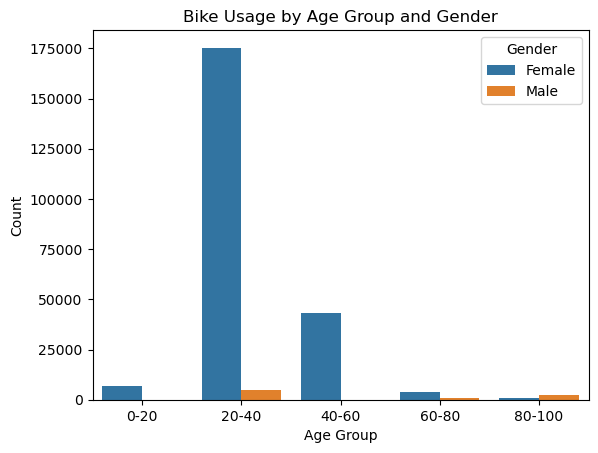

In [47]:
# Count of bike usage by gender and age group
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
sns.countplot(x='age_group', hue='member_gender', data=df)
plt.title("Bike Usage by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


#### observe that people (20:40) age are Subscriber more than Customers

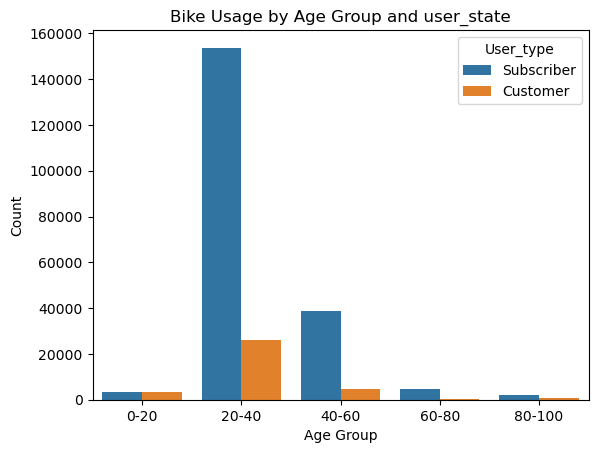

In [48]:
# Count of bike usage by gender and age group
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
sns.countplot(x='age_group', hue='user_type', data=df)
plt.title("Bike Usage by Age Group and user_state")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="User_type")
plt.show()


### there is no relation between user_type and duration of trip

<Axes: xlabel='user_type', ylabel='duration_sec'>

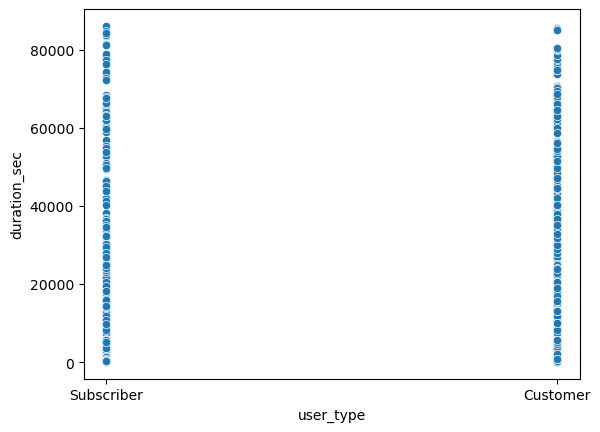

In [49]:
sns.scatterplot(data=df,x='user_type',y='duration_sec')

#### The most common start station and end station -----> the 5 most common start stations are same end stations   

In [50]:
df['start_station_id']=df['start_station_id'].astype('int')
df['start_station_id'].value_counts()

start_station_id
67     4866
58     4609
15     4270
81     3994
21     3550
       ... 
416      10
234       9
418       8
415       5
420       1
Name: count, Length: 357, dtype: int64

In [51]:
df['start_location']=df['start_station_name'].str.split().str[:2]

In [52]:
df['start_location'].value_counts()

start_location
[San, Francisco]      14663
[Market, St]           7379
[The, Embarcadero]     7241
[Powell, St]           6812
[Valencia, St]         5823
                      ...  
[21st, Ave]              16
[Sonora, Ave]            14
[Auzerais, Ave]          10
[Farnam, St]              9
[SF, Test]                1
Name: count, Length: 245, dtype: int64

In [53]:
df['end_location']=df['end_station_name'].str.split().str[:2]

In [54]:
df['end_location'].value_counts()

end_location
[San, Francisco]      17122
[The, Embarcadero]     7722
[Market, St]           7289
[Powell, St]           6973
[Valencia, St]         5731
                      ...  
[Gish, Rd]               18
[Willow, St]             15
[21st, Ave]              14
[Auzerais, Ave]          11
[Farnam, St]             11
Name: count, Length: 245, dtype: int64

#### are there specific bikes for a long trip? ----> NO

<Axes: xlabel='bike_id', ylabel='duration_sec'>

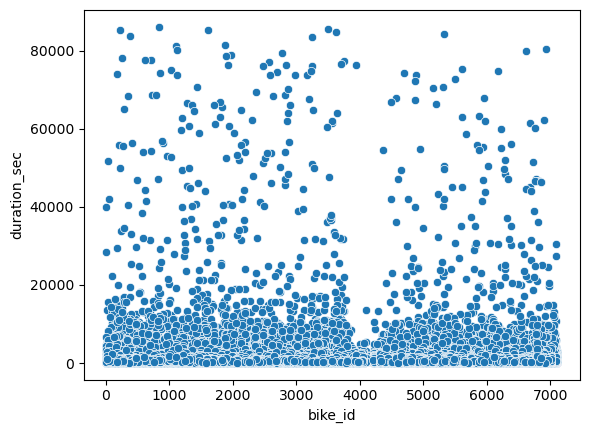

In [55]:
sns.scatterplot(data=df,x='bike_id',y='duration_sec')

In [56]:
df['days']=df['start_time'].dt.day

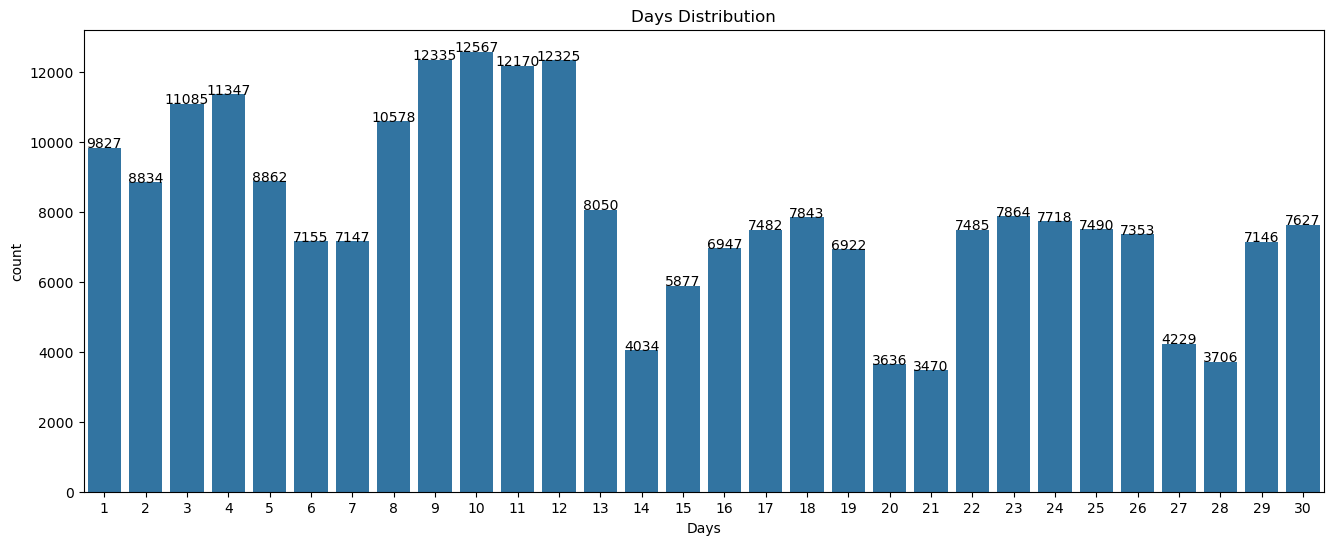

In [57]:
plt.figure(figsize=(16, 6))

sns.barplot(x=df['days'].value_counts().index, y=df['days'].value_counts())
plt.xlabel('Days')
plt.title('Days Distribution')

dep = df['days'].value_counts()
for i, value in enumerate(dep.values):
    plt.text(dep.index[i]-1, value + 5, str(value), ha='center')
plt.show()

In [58]:
df['hours']=df['start_time'].dt.hour

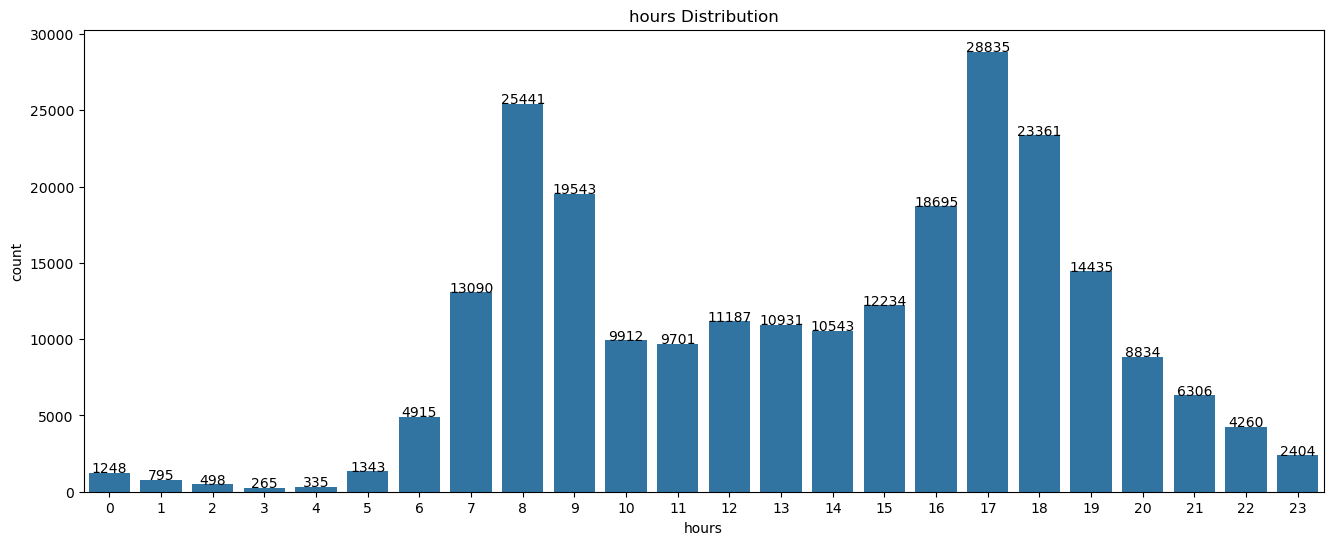

In [59]:
plt.figure(figsize=(16, 6))

sns.barplot(x=df['hours'].value_counts().index, y=df['hours'].value_counts())
plt.xlabel('hours')
plt.title('hours Distribution')

dep = df['hours'].value_counts()
for i, value in enumerate(dep.values):
    plt.text(dep.index[i], value + 5, str(value), ha='center')
plt.show()

In [60]:
df['hours_end']=df['end_time'].dt.hour

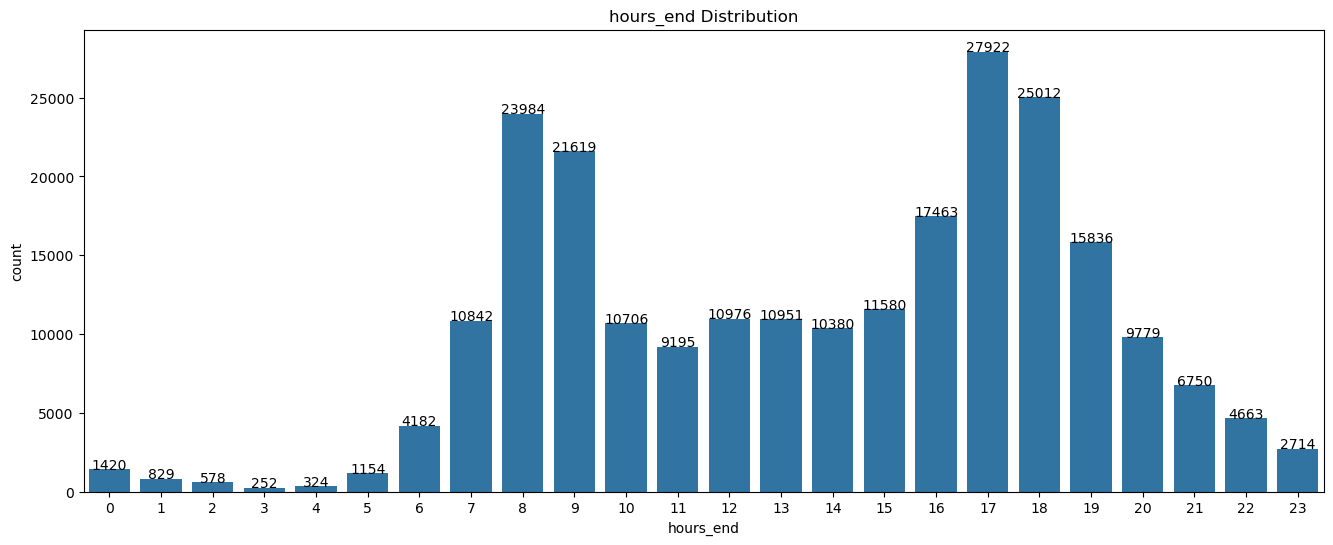

In [61]:
plt.figure(figsize=(16, 6))

sns.barplot(x=df['hours_end'].value_counts().index, y=df['hours_end'].value_counts())
plt.xlabel('hours_end')
plt.title('hours_end Distribution')

dep = df['hours_end'].value_counts()
for i, value in enumerate(dep.values):
    plt.text(dep.index[i], value + 5, str(value), ha='center')
plt.show()